In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as logr
from sklearn.model_selection import cross_val_score, LeaveOneOut, RepeatedKFold 
from sklearn.metrics import mean_squared_error, roc_curve, auc, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.exceptions import ConvergenceWarning 
from sklearn import tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
from kneed import KneeLocator

In [12]:
math_df = pd.read_csv('student-mat.csv')
por_df = pd.read_csv('student-por.csv')

In [13]:
math_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [14]:
math_df = pd.read_csv('student-mat.csv')
math = math_df.copy()
math = math.drop(['address', 'Pstatus', 'guardian', 'famsup','famsize','Medu','Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'nursery','romantic', "G1", 'G2'], axis=1)
math = pd.get_dummies(math, columns=['school', 'sex', 'schoolsup', 'paid', 'activities', 'internet', 'higher']) 
math
math = math.drop(['schoolsup_no', 'activities_no', 'paid_no', 'internet_no','higher_no', 'school_MS', 'sex_F'], axis = 1)
math

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_GP,sex_M,schoolsup_yes,paid_yes,activities_yes,internet_yes,higher_yes
0,18,2,0,4,3,4,1,1,3,6,6,1,0,1,0,0,0,1
1,17,2,0,5,3,3,1,1,3,4,6,1,0,0,0,0,1,1
2,15,2,3,4,3,2,2,3,3,10,10,1,0,1,1,0,1,1
3,15,3,0,3,2,2,1,1,5,2,15,1,0,0,1,1,1,1
4,16,2,0,4,3,2,1,2,5,4,10,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,5,5,4,4,5,4,11,9,0,1,0,1,0,0,1
391,17,1,0,2,4,5,3,4,2,3,16,0,1,0,0,0,1,1
392,21,1,3,5,5,3,3,3,3,3,7,0,1,0,0,0,0,1
393,18,1,0,4,4,1,3,4,5,0,10,0,1,0,0,0,1,1


In [15]:
por = por_df.copy()

In [16]:
por = por.drop(['address', 'Pstatus', 'guardian', 'famsup','famsize','Medu','Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'nursery','romantic', "G1", 'G2'], axis=1)
por = pd.get_dummies(por, columns=['school', 'sex', 'schoolsup', 'paid','activities', 'internet', 'higher'])
por = por.drop(['schoolsup_no', 'activities_no', 'paid_no', 'internet_no','higher_no', 'school_MS', 'sex_F'], axis = 1)

In [17]:
student = pd.merge(math_df, por_df, on=['school', 'sex', 'age', 'address','famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery','internet'])
student.dtypes
student = student.drop(['address', 'Pstatus', 'guardian_x','guardian_y','famsup_x','famsup_y', 'famsize', 'Medu','Fedu', 'Mjob', 'Fjob', 'reason','traveltime_x','traveltime_y' ,'nursery', 'romantic_x', 'romantic_y', "G1_x", 'G2_x'], axis=1)
student = pd.get_dummies(student, columns=['school', 'sex', 'schoolsup_x','schoolsup_y' , 'paid_x', 'paid_y', 'activities_x', 'activities_y','internet', 'higher_x', 'higher_y'])
student['Weekly_Alc_Consumption'] = student['Dalc_x'] + student['Walc_x']
student = student.drop(['activities_x_no', 'activities_y_no', 'internet_no','higher_x_no', 'higher_y_no', 'paid_x_no', 'paid_y_no', 'schoolsup_x_no','schoolsup_y_no', "G1_y", 'G2_y', 'school_MS', 'sex_M', 'studytime_y','famrel_y', 'freetime_y', 'Walc_y', 'Dalc_y', 'health_y', 'higher_y_yes','activities_y_yes', 'schoolsup_y_yes', 'goout_y', 'Dalc_x','Walc_x'], axis=1)
student.columns

Index(['age', 'studytime_x', 'failures_x', 'famrel_x', 'freetime_x', 'goout_x',
       'health_x', 'absences_x', 'G3_x', 'failures_y', 'absences_y', 'G3_y',
       'school_GP', 'sex_F', 'schoolsup_x_yes', 'paid_x_yes', 'paid_y_yes',
       'activities_x_yes', 'internet_yes', 'higher_x_yes',
       'Weekly_Alc_Consumption'],
      dtype='object')

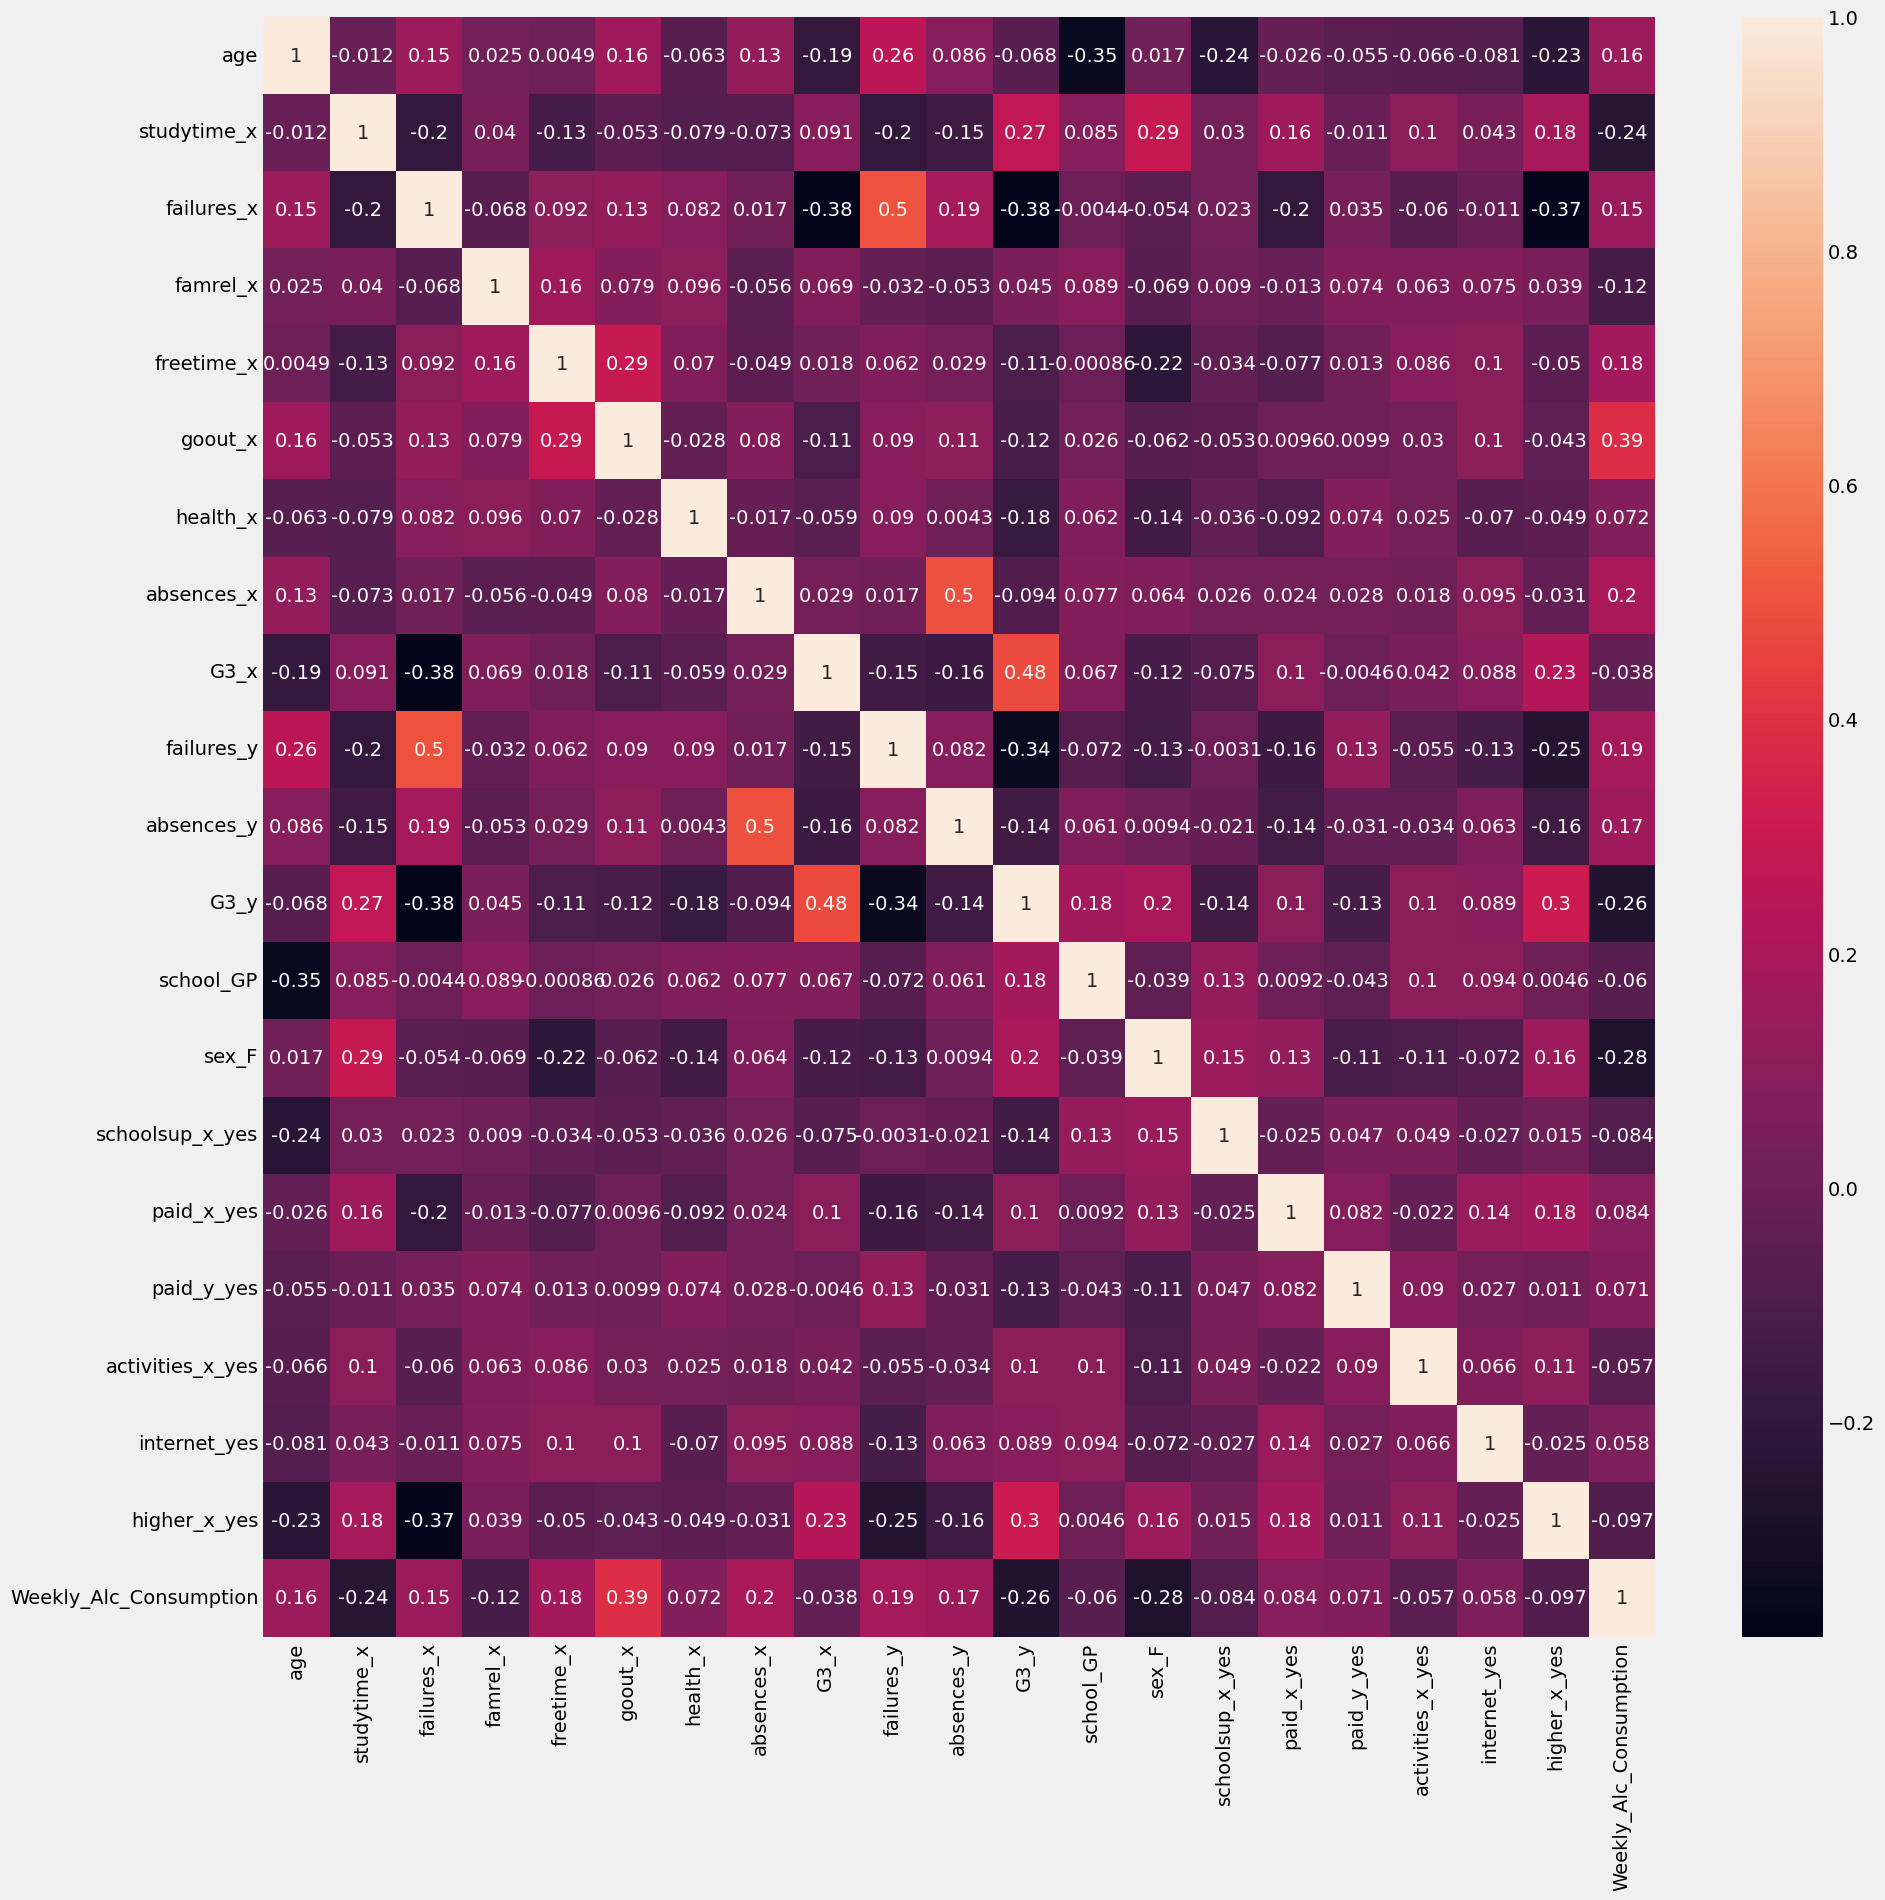

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(student.corr(),annot=True)
plt.show()
#correlation matrix to show if any of the predictors are highly related, this 
#correlation matrx is after we dropped the ones that had correlation >.7

In [19]:
student.columns

Index(['age', 'studytime_x', 'failures_x', 'famrel_x', 'freetime_x', 'goout_x',
       'health_x', 'absences_x', 'G3_x', 'failures_y', 'absences_y', 'G3_y',
       'school_GP', 'sex_F', 'schoolsup_x_yes', 'paid_x_yes', 'paid_y_yes',
       'activities_x_yes', 'internet_yes', 'higher_x_yes',
       'Weekly_Alc_Consumption'],
      dtype='object')

In [20]:
new_column_names = {'studytime_x': 'studytime', 'failures_x': 'failures_math','famrel_x': 'family_rel_quality', 'freetime_x':'freetime','goout_x': "going_out", 'Dalc_x': 'Workday_Alc_consum','Walc_x': 'Weeekend_alc', 'health_x': 'health_status_',
                    'absences_x': 'abscences_math', 'G3_x':'final_grade_math',
                    'failures_x=y': 'failures_port', 'absences_y':'abscences_port', 'G3_y':'final_grade_port','school_GP': 'school', 'sex_F':'Sex', 'schoolsup_x_yes':"extra_edu_support", 'paid_x_yes':'extra_paid_classes','activities_x_yes': 'Extra_curricular', 'internet_yes':'internet_access', 'higher_x_yes':'higher_edu_desired'
}

student = student.rename(columns=new_column_names)

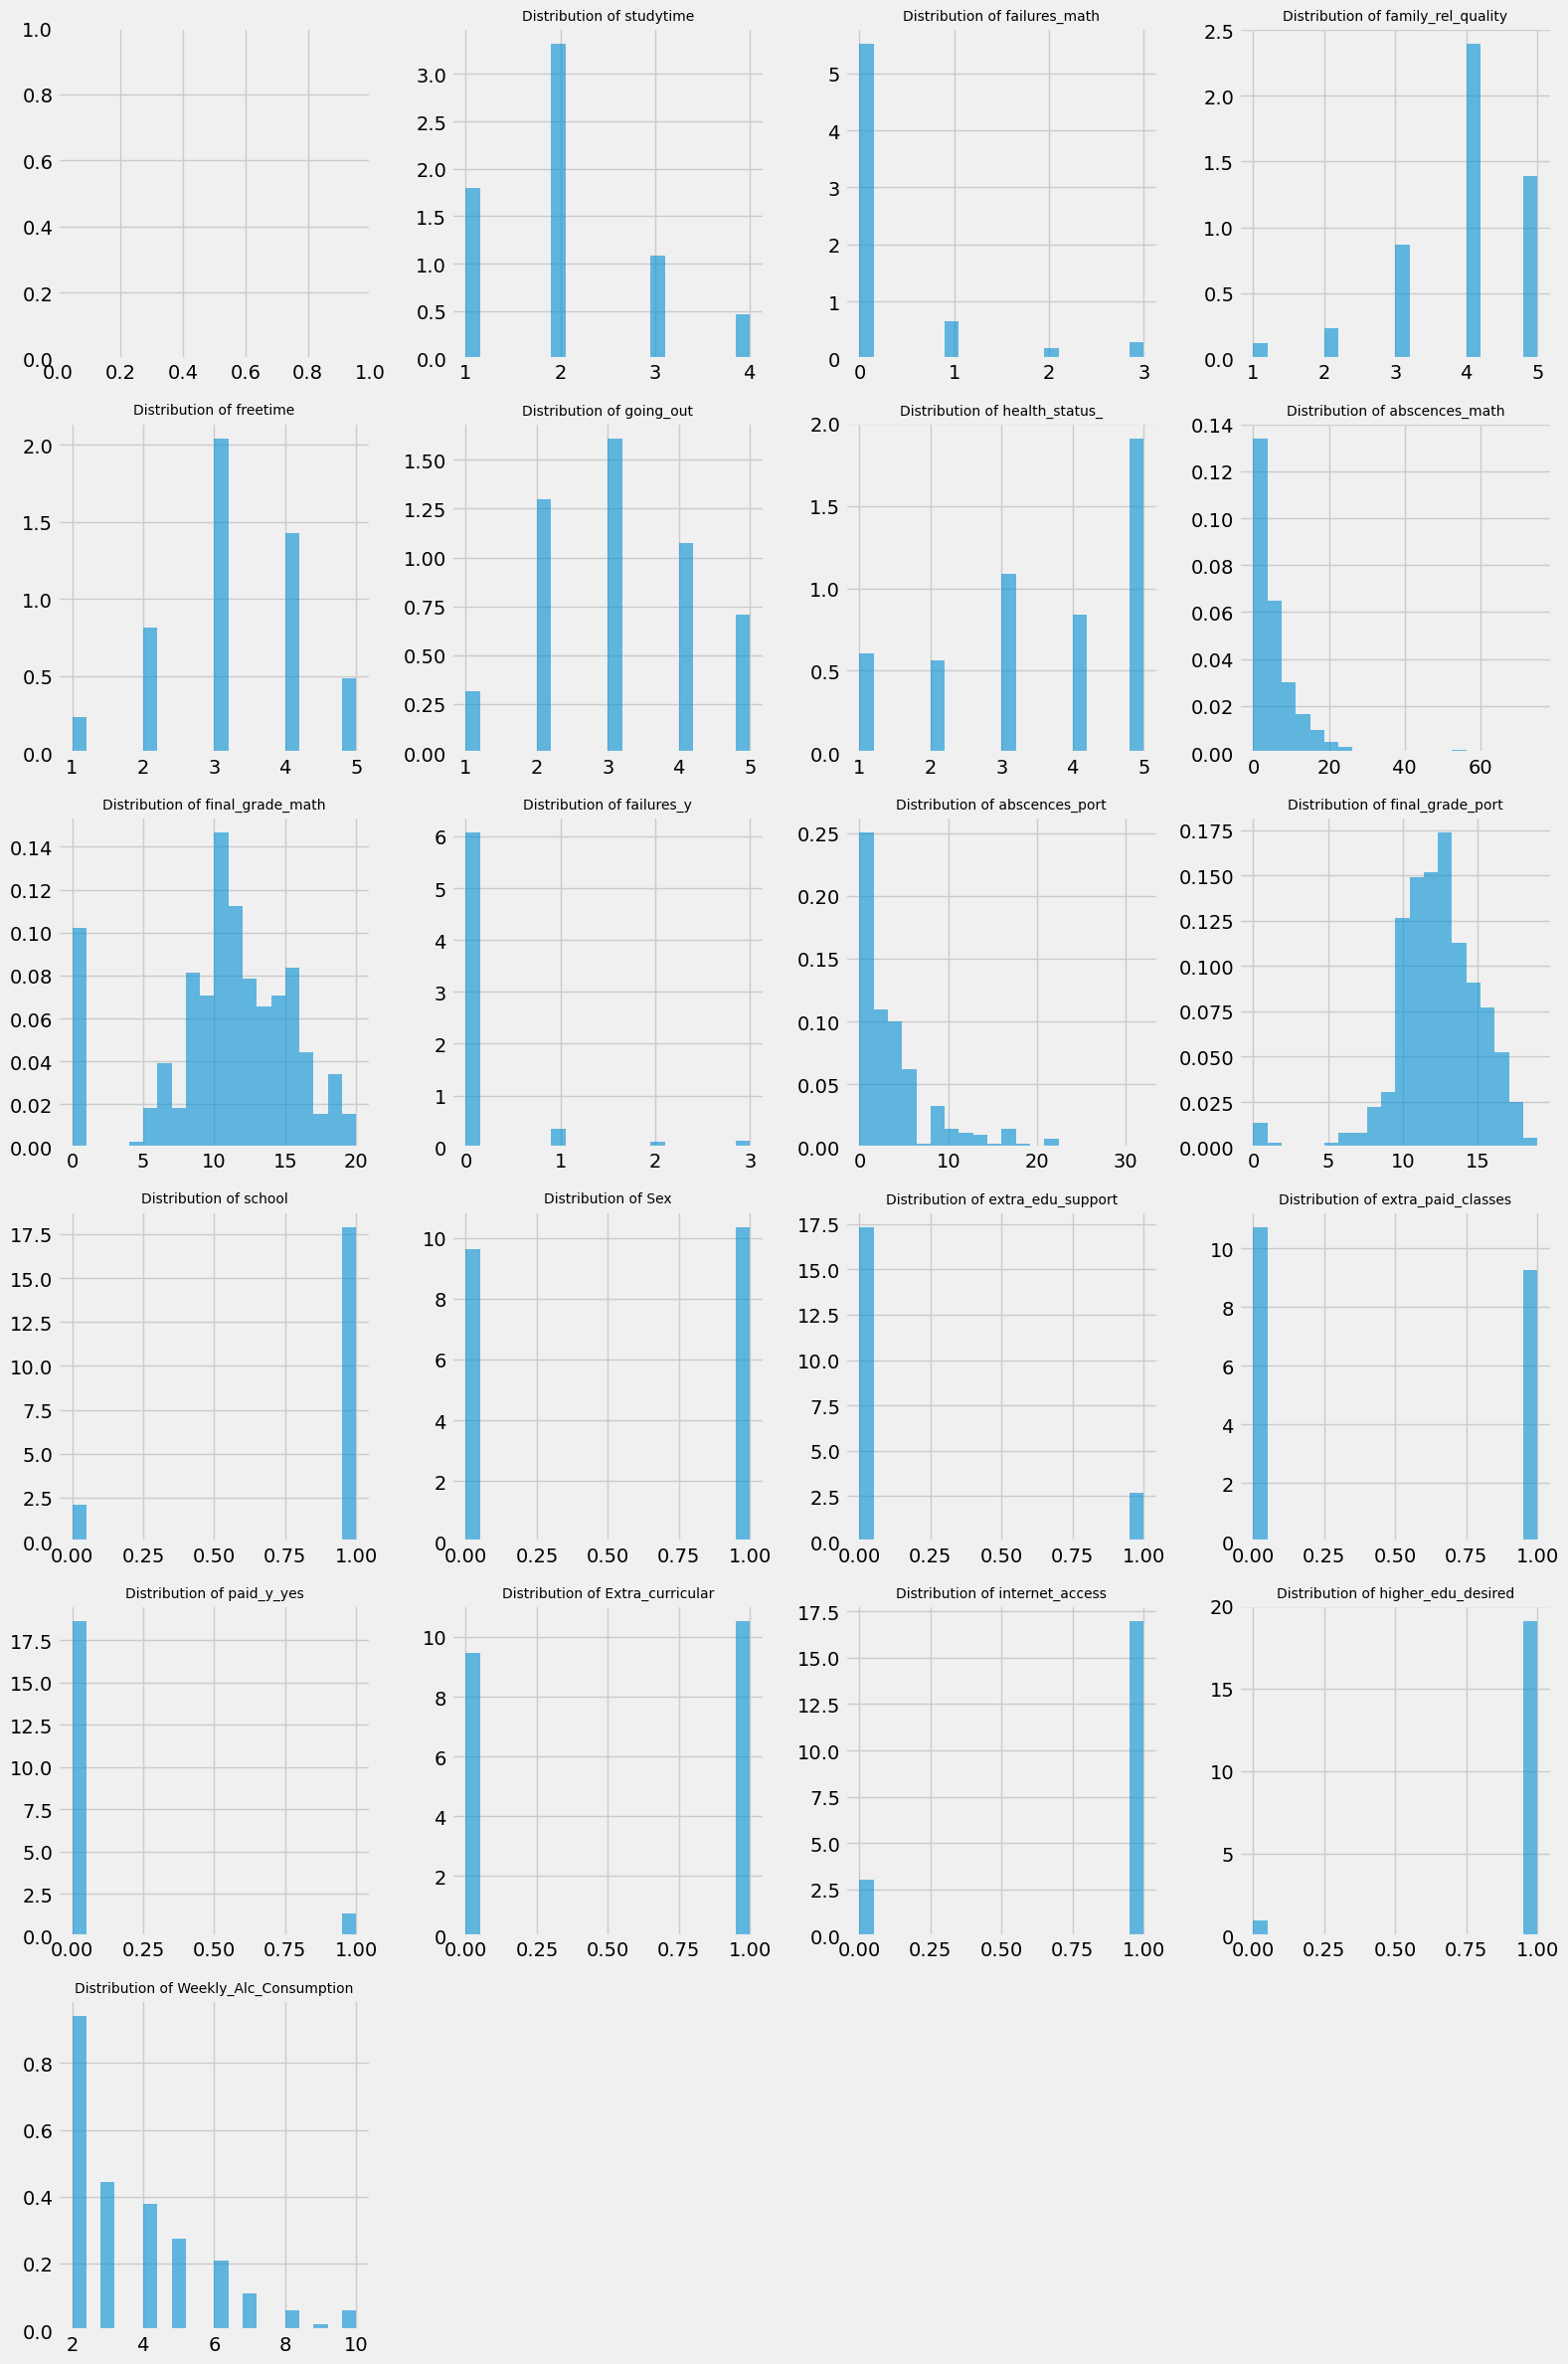

In [21]:
import matplotlib.pyplot as plt 
num_cols = len(student.columns)
num_rows = (num_cols - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))
for i, column in enumerate(student.columns[1:], start=1): # Start from index 1 to skip the first column
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(student[column], bins=20, density=True, alpha=0.6)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}',fontdict={'fontsize': 10}) # Adjust fontsize here axes[row_idx, col_idx].set_xlabel(column) axes[row_idx, col_idx].set_ylabel('Density')

for i in range(num_cols, num_rows * 4): 
    fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
plt.show()
# this an be one of the visualization for the EDA portion, it shows the distrubion of all the predictors

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

X = student.drop(['final_grade_math', 'final_grade_port'], axis=1) 
y_math = (student['final_grade_math'] >= 10).astype(int) # Binary classification for pass/fail in Math
y_portuguese = (student['final_grade_port'] >= 10).astype(int) # Binary classification for pass/fail in Portuguese

# Split the data into training and testing sets
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
X_train_portuguese, X_test_portuguese, y_train_portuguese, y_test_portuguese = train_test_split(X, y_portuguese, test_size=0.2, random_state=42)

#DecisionTreeClassifier
dt_classifier_math = DecisionTreeClassifier(random_state=42)
dt_classifier_math.fit(X_train_math, y_train_math)
dt_classifier_portuguese = DecisionTreeClassifier(random_state=42)
dt_classifier_portuguese.fit(X_train_portuguese, y_train_portuguese)
# KNeighborsClassifier
knn_classifier_math = KNeighborsClassifier()
knn_classifier_math.fit(X_train_math, y_train_math)
knn_classifier_portuguese = KNeighborsClassifier()
knn_classifier_portuguese.fit(X_train_portuguese, y_train_portuguese)
# LogisticRegression
lr_classifier_math = LogisticRegression(random_state=42)
lr_classifier_math.fit(X_train_math, y_train_math)
lr_classifier_portuguese = LogisticRegression(random_state=42)
lr_classifier_portuguese.fit(X_train_portuguese, y_train_portuguese)
# Make predictions
dt_pred_math = dt_classifier_math.predict(X_test_math)
dt_pred_portuguese = dt_classifier_portuguese.predict(X_test_portuguese)
knn_pred_math = knn_classifier_math.predict(X_test_math)
knn_pred_portuguese = knn_classifier_portuguese.predict(X_test_portuguese)
lr_pred_math = lr_classifier_math.predict(X_test_math)
lr_pred_portuguese = lr_classifier_portuguese.predict(X_test_portuguese)
# Calculate accuracy scores
accuracy_dt_math = accuracy_score(y_test_math, dt_pred_math)
accuracy_dt_portuguese = accuracy_score(y_test_portuguese, dt_pred_portuguese)
accuracy_knn_math = accuracy_score(y_test_math, knn_pred_math)
accuracy_knn_portuguese = accuracy_score(y_test_portuguese, knn_pred_portuguese)
accuracy_lr_math = accuracy_score(y_test_math, lr_pred_math)
accuracy_lr_portuguese = accuracy_score(y_test_portuguese, lr_pred_portuguese)
# Print accuracy scores
print("Decision Tree Classifier - Math Accuracy:", accuracy_dt_math) 
print("Decision Tree Classifier - Portuguese Accuracy:", accuracy_dt_portuguese) 
print("\n")
print("KNeighbors Classifier - Math Accuracy:", accuracy_knn_math) 
print("KNeighbors Classifier - Portuguese Accuracy:", accuracy_knn_portuguese) 
print("\n")
print("Logistic Regression - Math Accuracy:", accuracy_lr_math)
print("Logistic Regression - Portuguese Accuracy:", accuracy_lr_portuguese)

Decision Tree Classifier - Math Accuracy: 0.7272727272727273
Decision Tree Classifier - Portuguese Accuracy: 0.8961038961038961


KNeighbors Classifier - Math Accuracy: 0.6623376623376623
KNeighbors Classifier - Portuguese Accuracy: 0.8831168831168831


Logistic Regression - Math Accuracy: 0.7662337662337663
Logistic Regression - Portuguese Accuracy: 0.9090909090909091


/Users/emandabisrat/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emandabisrat/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Random Forest classifier for math scores
rf_classifier_math = RandomForestClassifier(n_estimators=50, random_state=42)

# parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 9],      
    'ccp_alpha': [0.001, 0.01, 0.1] 
}


grid_search_math = GridSearchCV(estimator=rf_classifier_math, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_math.fit(X_train_math, y_train_math)
best_params_math = grid_search_math.best_params_
print("Best Hyperparameters for Math Scores:", best_params_math)


rf_pred_math = grid_search_math.predict(X_test_math)
accuracy_rf_math = accuracy_score(y_test_math, rf_pred_math)
print("Random Forest Accuracy - Math:", accuracy_rf_math)

# repeat the process for Portuguese scores
# Random Forest classifier for Portuguese scores
rf_classifier_portuguese = RandomForestClassifier(n_estimators=50, random_state=42)
grid_search_portuguese = GridSearchCV(estimator=rf_classifier_portuguese, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_portuguese.fit(X_train_portuguese, y_train_portuguese)

# best hyperparameters
best_params_portuguese = grid_search_portuguese.best_params_
print("Best Hyperparameters for Portuguese Scores:", best_params_portuguese)

#best model to make predictions for Portuguese scores
rf_pred_portuguese = grid_search_portuguese.predict(X_test_portuguese)

#Caccuracy for Portuguese scores
accuracy_rf_portuguese = accuracy_score(y_test_portuguese, rf_pred_portuguese)
print("Random Forest Accuracy - Portuguese:", accuracy_rf_portuguese)


Best Hyperparameters for Math Scores: {'ccp_alpha': 0.001, 'max_depth': 3}
Random Forest Accuracy - Math: 0.8181818181818182
Best Hyperparameters for Portuguese Scores: {'ccp_alpha': 0.001, 'max_depth': 3}
Random Forest Accuracy - Portuguese: 0.8831168831168831


In [42]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_classifier_d_math = RandomForestClassifier(n_estimators=50, max_depth=3, ccp_alpha=0.001, random_state=42)

rf_classifier_d_math.fit(X_train_math, y_train_math)
rf_pred_math_d = rf_classifier_d_math.predict(X_test_math)
#accuracy for math scores
accuracy_rf_math_d = accuracy_score(y_test_math, rf_pred_math_d)
#accuracy score for Model D - Math
print ("Random Forest Model D Accuracy - Math (Increased Estimators):", accuracy_rf_math_d)

#repeat the process for Portuguese scores

rf_classifier_d_portuguese = RandomForestClassifier(n_estimators=50, max_depth=8, ccp_alpha=0.001, random_state=42)
rf_classifier_d_portuguese.fit(X_train_portuguese, y_train_portuguese)
rf_pred_portuguese_d=rf_classifier_d_portuguese.predict(X_test_portuguese)
#accuracy for Portuguese scores
accuracy_rf_portuguese_d = accuracy_score(y_test_portuguese, rf_pred_portuguese_d)
#accuracy score for Model D - Portuguese
print ("Random Forest Model D Accuracy - Portuguese (Increased Estimators):", accuracy_rf_portuguese_d)

Random Forest Model D Accuracy - Math (Increased Estimators): 0.8181818181818182
Random Forest Model D Accuracy - Portuguese (Increased Estimators): 0.9090909090909091


Random Forest Model D Accuracy - Math (Increased Estimators): 0.8051948051948052


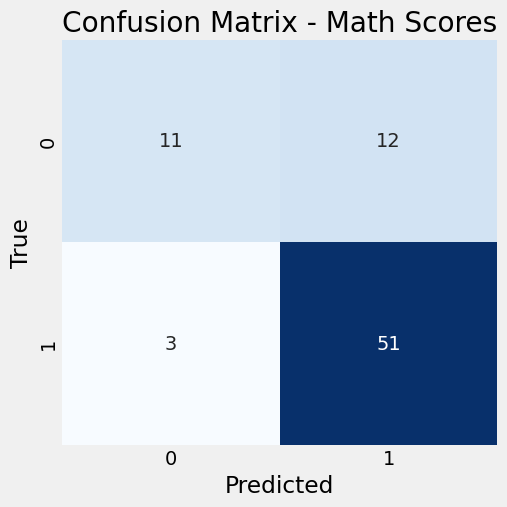

Random Forest Model D Accuracy - Portuguese (Increased Estimators): 0.9090909090909091


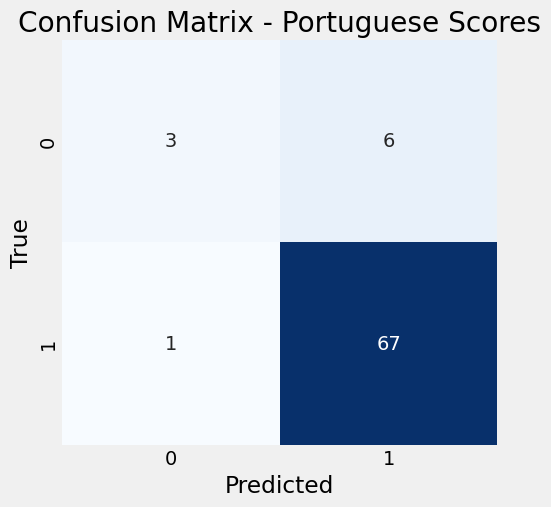

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

rf_classifier_d_math = RandomForestClassifier(n_estimators=50, max_depth=5, ccp_alpha=0.01, random_state=42)
rf_classifier_d_math.fit(X_train_math, y_train_math)
rf_pred_math_d = rf_classifier_d_math.predict(X_test_math)

#accuracy for math scores
accuracy_rf_math_d = accuracy_score(y_test_math, rf_pred_math_d)

#accuracy score for Model D - Math
print("Random Forest Model D Accuracy - Math (Increased Estimators):", accuracy_rf_math_d)

#confusion matrix for math scores
plot_confusion_matrix(y_test_math, rf_pred_math_d, "Confusion Matrix - Math Scores")

#repeat the process for Portuguese scores

rf_classifier_d_portuguese = RandomForestClassifier(n_estimators=50, max_depth=9, ccp_alpha=0.00, random_state=42)
rf_classifier_d_portuguese.fit(X_train_portuguese, y_train_portuguese)
rf_pred_portuguese_d = rf_classifier_d_portuguese.predict(X_test_portuguese)

#accuracy for Portuguese scores
accuracy_rf_portuguese_d = accuracy_score(y_test_portuguese, rf_pred_portuguese_d)

#accuracy score for Model D - Portuguese
print("Random Forest Model D Accuracy - Portuguese (Increased Estimators):", accuracy_rf_portuguese_d)

#confusion matrix for Portuguese scores
plot_confusion_matrix(y_test_portuguese, rf_pred_portuguese_d, "Confusion Matrix - Portuguese Scores")


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf_math = confusion_matrix(y_test_rf_math, rf_pred_math)

cm_display_rf_math = ConfusionMatrixDisplay(confusion_matrix=cm_rf_math, display_labels=['Fail', 'Pass'])
cm_display_rf_math-plot(cmap='viridis') 
plt. title('Confusion Matrix - Math Scores (Random Forest)')
plt.xlabel ('Predicted Label')
plt.ylabel('True Label')
plt. show()

cm_rf_portuguese = confusion_matrix(y_test_rf_portuguese, rf_pred_portuguese)

cm_display_rf_portuguese = ConfusionMatrixDisplay(confusion_matrix=cm_rf_portuguese, display_labels=['Fail', 'Pass'])
cm_display_rf_portuguese.plot(cmap='viridis') 
plt.xlabel('Predicted Label')
plt.ylabel ('True Label')
plt.show()

NameError: name 'y_test_rf_math' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the multi-output neural network model
input_layer = Input(shape=(X_train.shape[1],))
shared_hidden_layer = Dense(64, activation='relu')(input_layer)

output_math = Dense(1, activation='linear', name='output_math')(shared_hidden_layer)
output_portuguese = Dense(1, activation='linear', name='output_portuguese')(shared_hidden_layer)

model = Model(inputs=input_layer, outputs=[output_math, output_portuguese])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, [y_math_train, y_portuguese_train], epochs=50, batch_size=32, validation_split=0.2)

loss, math_loss, portuguese_loss = model.evaluate(X_test, [y_math_test, y_portuguese_test])
print(f"Mean Squared Error on Test Set (Math): {math_loss}")
print(f"Mean Squared Error on Test Set (Portuguese): {portuguese_loss}")

predictions_math, predictions_portuguese = model.predict(X_test)

In [23]:
student['final_grade_math']

0       6
1       6
2      10
3      15
4      10
       ..
377     8
378     0
379     0
380    16
381    10
Name: final_grade_math, Length: 382, dtype: int64

In [24]:
y_math

0      0
1      0
2      1
3      1
4      1
      ..
377    0
378    0
379    0
380    1
381    1
Name: final_grade_math, Length: 382, dtype: int64

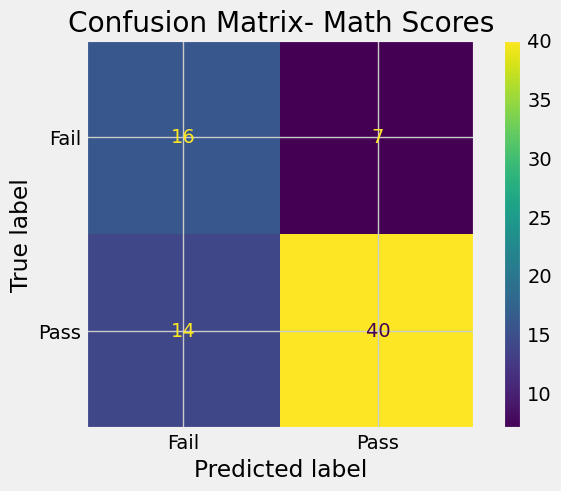

In [26]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_math,dt_pred_math ) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fail', 'Pass']) 
cm_display.plot()
plt.title('Confusion Matrix- Math Scores')
plt.show()

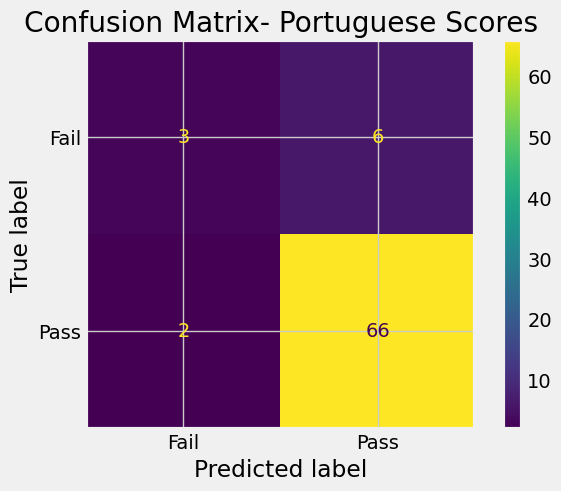

In [27]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_portuguese,dt_pred_portuguese )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fail', 'Pass']) 
cm_display.plot()
plt.title('Confusion Matrix- Portuguese Scores') 
plt.show()

In [29]:
from sklearn.cluster import KMeans
# Features and number of clusters
features = ['Weekly_Alc_Consumption', 'final_grade_math'] # Using features from the math dataset 
n_clusters = 3
# Initialize KMeans
kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10, max_iter=300) # Fit KMeans on the specified features
kmeans.fit(student[features])
# Print results
print('The lowest SSE value found: %.3f' % kmeans.inertia_)
print('The number of iterations required to converge: %d' % kmeans.n_iter_)



The lowest SSE value found: 2589.591
The number of iterations required to converge: 11


The lowest SSE value found: 2589.591
The number of iterations required to converge: 9


Text(0.5, 1.0, 'Affect of Weekly Alcohol Consumption on Final Math Grade')

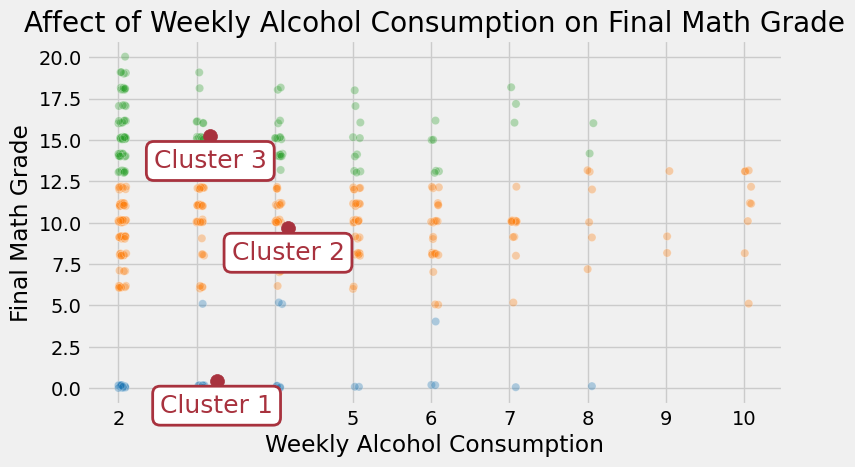

In [42]:
features = ['Weekly_Alc_Consumption', 'final_grade_math']
n_clusters = 3
kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10, max_iter=300)
kmeans.fit(student[features])
print('The lowest SSE value found: %.3f'%kmeans.inertia_)
print('The number of iterations required to converge: %d'%kmeans.n_iter_)
fig, ax = plt.subplots(figsize=(8, 4.5))
# Plot and add jitter for better visualization
ax = sns.scatterplot(ax=ax, x=student[features[0]]+np.random.rand(len(student))*0.1, y=student[features[1]]+np.random.rand(len(student))*0.2,
hue=kmeans.labels_,palette=sns.color_palette('tab10', n_colors=n_clusters), legend=None, alpha = 0.33)
for n, [dur, qual] in enumerate(kmeans.cluster_centers_): 
    ax.scatter(dur, qual, s=100, c='#a8323e') 
    ax.annotate('Cluster %d'%(n+1), (dur, qual), fontsize=18,
                color='#a8323e', xytext=(dur, qual-1.5),
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='#a8323e',lw=2),
                ha='center', va='center');
ax.set_xlabel('Weekly Alcohol Consumption')
ax.set_ylabel('Final Math Grade')
ax.set_title('Affect of Weekly Alcohol Consumption on Final Math Grade')

In [38]:
from sklearn.cluster import KMeans
# Features and number of clusters
features = ['Weekly_Alc_Consumption', 'final_grade_port'] # Using features from the math dataset 
n_clusters = 4
# Initialize KMeans
kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10, max_iter=300) # Fit KMeans on the specified features
kmeans.fit(student[features])
# Print results
print('The lowest SSE value found: %.3f' % kmeans.inertia_)
print('The number of iterations required to converge: %d' % kmeans.n_iter_)



The lowest SSE value found: 1435.715
The number of iterations required to converge: 9


The lowest SSE value found: 1435.715
The number of iterations required to converge: 13


Text(0.5, 1.0, 'Affect of Weekly Alcohol Consumption on Final Portuguese Grade')

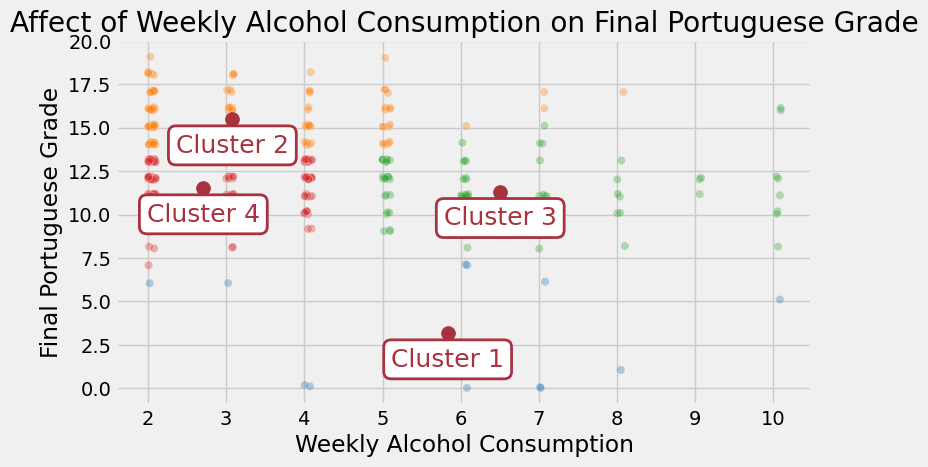

In [43]:
features = ['Weekly_Alc_Consumption', 'final_grade_port']
n_clusters = 4
kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10, max_iter=300)
kmeans.fit(student[features])
print('The lowest SSE value found: %.3f'%kmeans.inertia_)
print('The number of iterations required to converge: %d'%kmeans.n_iter_)
fig, ax = plt.subplots(figsize=(8, 4.5))
# Plot and add jitter for better visualization
ax = sns.scatterplot(ax=ax, x=student[features[0]]+np.random.rand(len(student))*0.1, y=student[features[1]]+np.random.rand(len(student))*0.2,
hue=kmeans.labels_,palette=sns.color_palette('tab10', n_colors=n_clusters), legend=None, alpha = 0.33)
for n, [dur, qual] in enumerate(kmeans.cluster_centers_): 
    ax.scatter(dur, qual, s=100, c='#a8323e') 
    ax.annotate('Cluster %d'%(n+1), (dur, qual), fontsize=18,
                color='#a8323e', xytext=(dur, qual-1.5),
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='#a8323e',lw=2),
                ha='center', va='center');
ax.set_xlabel('Weekly Alcohol Consumption')
ax.set_ylabel('Final Portuguese Grade')
ax.set_title('Affect of Weekly Alcohol Consumption on Final Portuguese Grade')